# Cleaning dataset in Python using Pandas and NumPy

Before starting to work with the dataset, it is important correct or remove incorrect or unnecessary data from a dataset before data analysis.

Input data: Marketing Campaign from Kaggle.com. The raw data was edited in Excel Power Query.

Table of Contents:

1. Import libraries
2. Input dataset "Customer Personality Analysis"
3. Look into data and take notes for changes
4. Search for Missing Data
5. Detect Outliers
6. Check for Duplicates
7. Check for Incorrect values for each columns

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Input dataset "Customer Personality Analysis"

df = pd.read_csv('marketing_campaign_all.csv', header=0, delimiter=";")

First of all we will look at dataset closely a take some notes what we should to change for better data analysis.

In [3]:
#Look at the first few rows of our dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsP

In [4]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [5]:
#Here we can see the number of rows and columns in the dataset and the types of data in each column
print(df.shape)
print(df.dtypes)

(2240, 29)
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [6]:
#For a more detailed view, we can print columns containing numeric data

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['ID' 'Year_Birth' 'Income' 'Kidhome' 'Teenhome' 'Recency' 'MntWines'
 'MntFruits' 'MntMeatProducts' 'MntFishProducts' 'MntSweetProducts'
 'MntGoldProds' 'NumDealsPurchases' 'NumWebPurchases'
 'NumCatalogPurchases' 'NumStorePurchases' 'NumWebVisitsMonth'
 'AcceptedCmp3' 'AcceptedCmp4' 'AcceptedCmp5' 'AcceptedCmp1'
 'AcceptedCmp2' 'Complain' 'Z_CostContact' 'Z_Revenue' 'Response']


In [7]:
#or non numeric data

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Education' 'Marital_Status' 'Dt_Customer']


We can see a few incorrect data what we should to change:

In column Id, min ID is 0
In column Year_Birth, min value is 1893
Change Columns AcceptedCmp order for better view
Change data type in column Dt_Customer
Rename some columns
Also we should do basic steps for cleaning dataset

Search Missing Data
Detect Outliers
Check Duplicates
Check for Incorrect values

In [8]:
#Change ID value with 0. Last Id is 11191, so we can replace 0 id to 11192
df['ID'] = df['ID'].replace([0], 11192)

In [9]:
#Check if ID is really changed
df.sort_values(by='ID', ascending=False).head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,11192,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0
341,11191,1986,Graduation,Divorced,41411.0,0,0,07-12-2013,11,37,32,38,11,3,18,1,2,1,4,6,0,0,0,0,0,0,3,11,0
997,11188,1957,Graduation,Together,26091.0,1,1,25-02-2014,84,15,10,19,8,17,20,3,2,1,3,5,0,0,0,0,0,0,3,11,0
2183,11187,1978,Basic,Single,26487.0,1,0,20-05-2013,23,2,8,10,12,14,23,3,2,1,3,5,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0


In [10]:
#Change the column order
df_clean = df.reindex(columns=['ID', 'Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue','Response'])
print(df_clean.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsP

In [13]:
#Change data type for column Dt_Customer

df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], infer_datetime_format=True, errors='ignore')
df_clean['Dt_Customer'] = df_clean['Dt_Customer'].dt.normalize()

In [14]:
#Check if data type is changed
print(df_clean.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
Complain                        int64
Z_CostContac

In [15]:
#Rename columns name
df_clean.rename(columns={"Z_CostContact": "CostContact", "Z_Revenue": "Revenue"}, inplace=True)

In [16]:
print(df_clean.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
Complain                        int64
CostContact 

## Searching for Missing data

In [17]:
print(df_clean.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
CostContact             0
Revenue                 0
Response                0
dtype: int64


In [18]:
#or we can print percentage of Missing Values
print(df_clean.isnull().sum()/len(df)*100)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
Complain               0.000000
CostContact            0.000000
Revenue                0.000000
Response               0.000000
dtype: float64


There are 24 NULL values in Income column and in the whole dataframe. We have a few options what we can do with Missing Values:

Drop the data
Input missing data
In our case will be better choose option number 2, but we don't have access to other documents to fill the real data. Therefore, we replace the empty values with zero

In [19]:
df_clean['Income'] = df_clean['Income']. fillna (0)

In [20]:
#checking
print(df_clean.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Complain               0
CostContact            0
Revenue                0
Response               0
dtype: int64


## Detect Outliers
One way to see the outliers is to visualize each column as a histogram or box plot (if the value is numeric). Here is example of a column Year_Birth, because we already know that is there some incorrect value.

<AxesSubplot:>

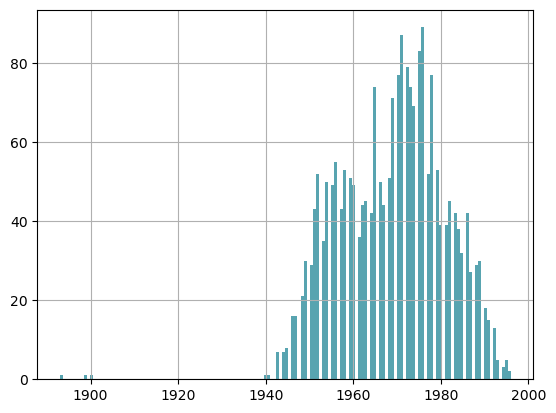

In [21]:
#Histogram
df_clean['Year_Birth'].hist(bins=150, color='#58a4b0')

<AxesSubplot:>

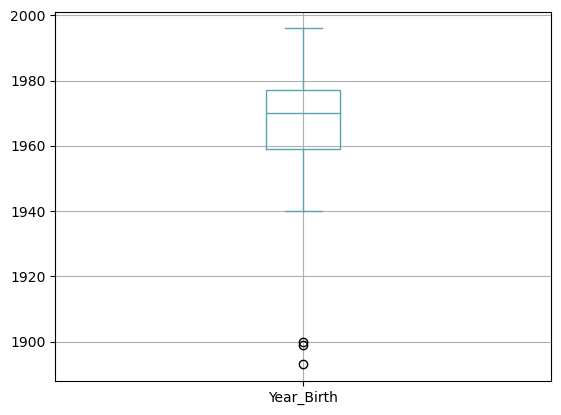

In [22]:
#To explore values more closely, let's create a box plot
df_clean.boxplot(column=['Year_Birth'], color='#58a4b0')

In [23]:
#We see that the three values are outliers. To be more specific about these outliers, let's sort values in ascending order.
df_clean.sort_values(by='Year_Birth', ascending=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,CostContact,Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,0,0,1,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,2013-08-07,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,0,0,1,0,3,11,0
1150,1453,1943,PhD,Widow,57513.0,0,0,2013-06-07,59,735,40,183,52,20,30,2,9,3,13,6,0,0,0,0,0,0,3,11,0
415,7106,1943,PhD,Married,75865.0,0,0,2014-03-31,73,483,0,591,156,0,12,1,3,5,10,1,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,0.0,0,0,2013-10-30,75,532,126,490,164,126,126,1,5,5,11,1,0,0,0,0,1,0,3,11,1
358,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,1,3,11,0
1923,4994,1943,Master,Single,77598.0,0,0,2013-01-10,53,1193,33,281,129,66,33,1,7,5,13,3,0,0,0,0,1,0,3,11,0


Birth years 1893, 1899, 1900 do not seem real or typical in this dataset. The best way is to check the real year of birth of the customers and change the value

## Check for Duplicates

In [24]:
df_clean.duplicated().value_counts()

False    2240
dtype: int64

## Check for Incorrect values

In [25]:
#Checking for Incorrect values for each columns. This method can show us a unique values (include lowecase, uppercase).
df_clean['ID'].value_counts(dropna=False) #ok
df_clean['Year_Birth'].value_counts(dropna=False) #ok exepct 1893, 1899, 1900
df_clean['Marital_Status'].value_counts(dropna=False) 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We can see strange values in the Marital_Status column. According to the official classification, there are five statuses:

Married 
Widowed 
Separated 
Divorced 
Single 

"Together" is not the official marital status and should be changed to "Single". but in our case, it is better to leave it as it is, it may be useful for future analysis. "Alone" is a synonymum "Single", so it can be changed.

In [26]:
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(['Alone'], 'Single')

In [27]:
df_clean['Marital_Status'].value_counts(dropna=False) 

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [28]:
#Saving clean dataset
df_clean.to_csv('marketing_campaign_cleaned.csv')